In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.base import clone
from cross_val import *
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.linear_model import LinearRegression

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [7]:
def plotNumbers(X, y):
    _, axes = plt.subplots(nrows=1, ncols=len(y), figsize=(10, 3))

    for ax, image, label in zip(axes, X, y):
        ax.set_axis_off()
        ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
        ax.set_title("Training: %s" % str(label))

def plot_confusion_matrix(predicted, y):
    cm = confusion_matrix(y, predicted)
    cmp = ConfusionMatrixDisplay(cm)
    fig, ax = plt.subplots(figsize=(10,10))
    cmp.plot(ax=ax)

In [25]:
train_samples = 5000

X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=train_samples, test_size=5000)

In [26]:
X_train[:] = 255 - X_train[:]

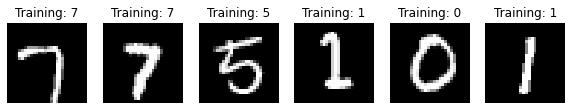

In [27]:
#print(X_train[0])
plotNumbers(X_train[:6], y_train[:6])

In [28]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(),
    DecisionTreeClassifier(max_depth=5),
    LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1),
    LinearRegression()
]

In [31]:
def checkClassifier(clf,X_train,y_train):
    trained_clf, accuracy_list = cross_val(clf, X_train, y_train, 5)

    print(accuracy_list)

    best_clf = trained_clf[np.argmax(accuracy_list)]
    Z = best_clf.predict(X_val)
    accuracy = accuracy_score(y_val, Z)

    print("Best classifier performance %.4f" %  accuracy)

    return best_clf

<h1>KNN</h1>

[0.95, 0.9425, 0.9425, 0.9425, 0.943]
Best classifier performance 0.9434


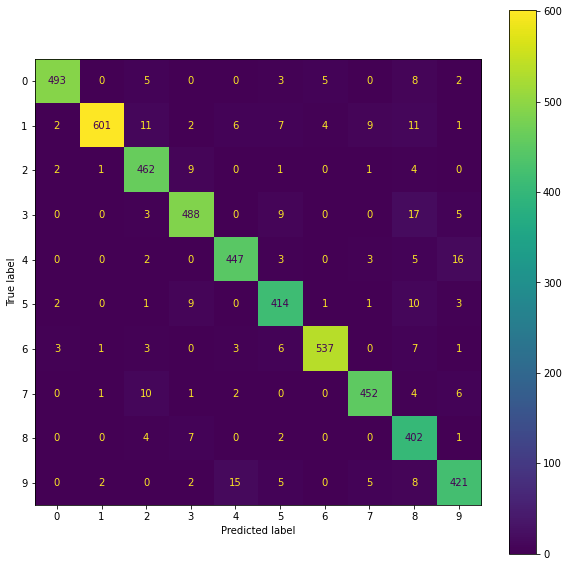

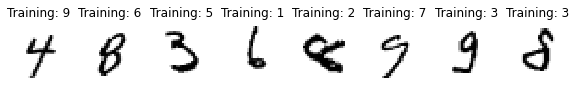

In [11]:
best_clf = checkClassifier(classifiers[0])
Z = best_clf.predict(X_val)
plot_confusion_matrix(y_val, Z)

wrong_predictions = [i for i in np.arange(len(Z)) if Z[i] != y_val[i]]
plotNumbers(X_val[wrong_predictions][:8], Z[wrong_predictions][:8])

<h1>SVM</h1>

[0.9615, 0.9605, 0.958, 0.953, 0.957]
Best classifier performance 0.9584


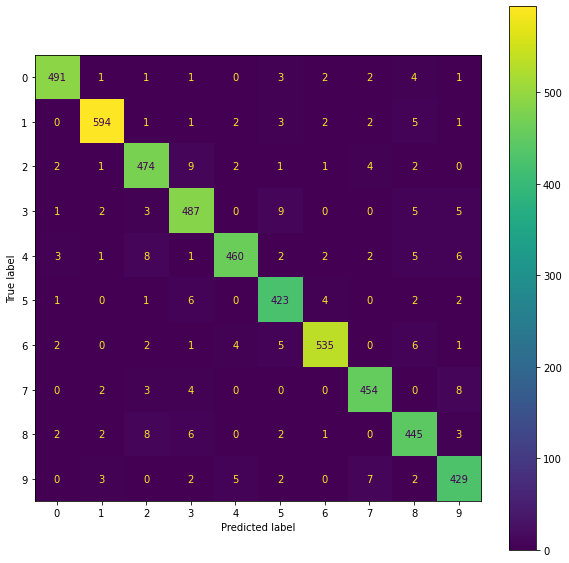

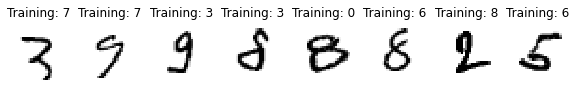

In [12]:
best_clf = checkClassifier(classifiers[1])
Z = best_clf.predict(X_val)
plot_confusion_matrix(y_val, Z)

wrong_predictions = [i for i in np.arange(len(Z)) if Z[i] != y_val[i]]
plotNumbers(X_val[wrong_predictions][:8], Z[wrong_predictions][:8])

<h1>Decision Tree</h1>

[0.643, 0.6585, 0.671, 0.657, 0.6645]
Best classifier performance 0.6760


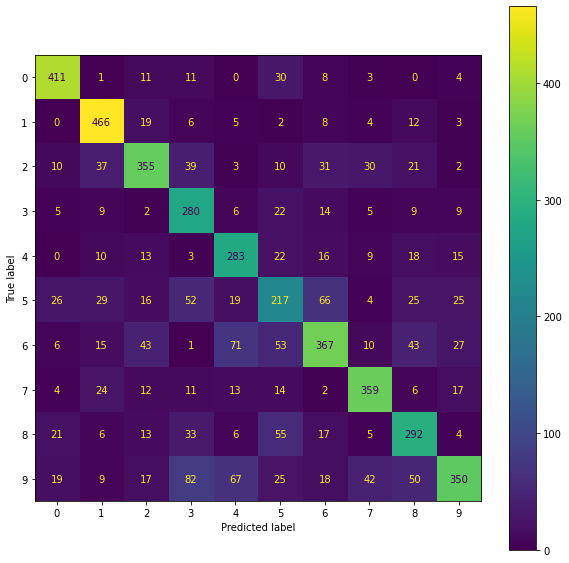

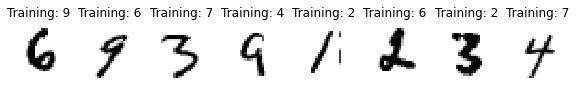

In [13]:
best_clf = checkClassifier(classifiers[2])
Z = best_clf.predict(X_val)
plot_confusion_matrix(y_val, Z)

wrong_predictions = [i for i in np.arange(len(Z)) if Z[i] != y_val[i]]
plotNumbers(X_val[wrong_predictions][:8], Z[wrong_predictions][:8])

<h1>Logistic regression</h1>

[0.889, 0.881, 0.882, 0.891, 0.867]
Best classifier performance 0.0008


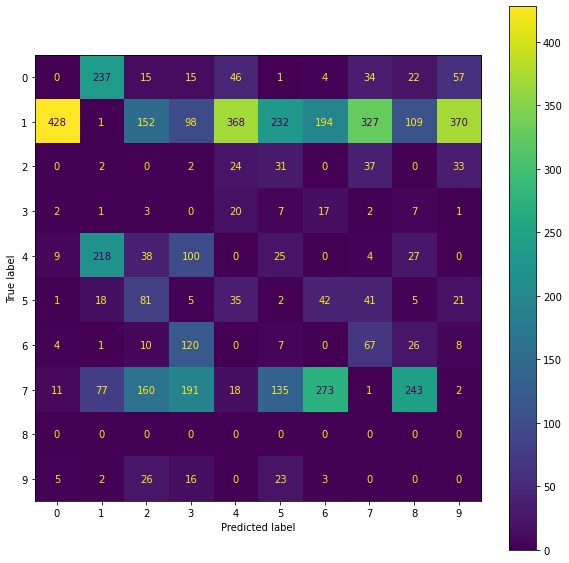

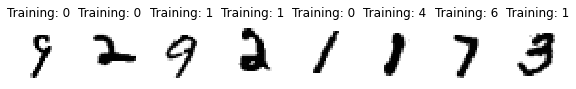

In [32]:
best_clf = checkClassifier(classifiers[3], X_train, y_train)
Z = best_clf.predict(X_val)
plot_confusion_matrix(y_val, Z)

wrong_predictions = [i for i in np.arange(len(Z)) if Z[i] != y_val[i]]
plotNumbers(X_val[wrong_predictions][:8], Z[wrong_predictions][:8])

<h1>Linear regression</h1>

In [15]:
best_clf = checkClassifier(classifiers[4])
Z = best_clf.predict(X_val)
plot_confusion_matrix(y_val, Z)

wrong_predictions = [i for i in np.arange(len(Z)) if Z[i] != y_val[i]]
plotNumbers(X_val[wrong_predictions][:8], Z[wrong_predictions][:8])

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets